In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/project/student.csv", sep=',', header=None)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Dataset shape: (5930, 21)
         0         1         2         3         4        5         6   \
0  1.183667 -0.962115  3.665798 -2.328834  1.527236 -0.46294  2.032244   
1  1.183667  1.039377 -0.272792  0.429399  1.527236 -0.46294  2.892074   
2  1.416177 -0.962115 -0.272792  0.429399 -0.654777 -0.46294  4.611734   
3  1.183667  1.039377 -0.272792  0.429399 -0.654777 -0.46294  2.318854   
4  1.474305 -0.962115  3.665798 -2.328834 -0.654777 -0.46294 -0.403940   

         7         8         9   ...        11        12        13        14  \
0  0.636383 -0.311182 -1.644330  ...  0.651536 -0.271907 -1.111598 -0.017569   
1 -0.527146 -2.320300 -1.644330  ... -0.552993 -2.242559 -1.501605 -2.013148   
2 -0.527146  0.549869 -1.242331  ... -0.552993  0.009615 -0.721591  0.381547   
3 -0.527146 -0.024165  0.365662  ... -0.552993 -0.834950  0.448431  0.301724   
4  0.054618  1.410920 -0.438335  ...  0.049272  0.854180 -0.331583  0.381547   

         15        16        17        18       

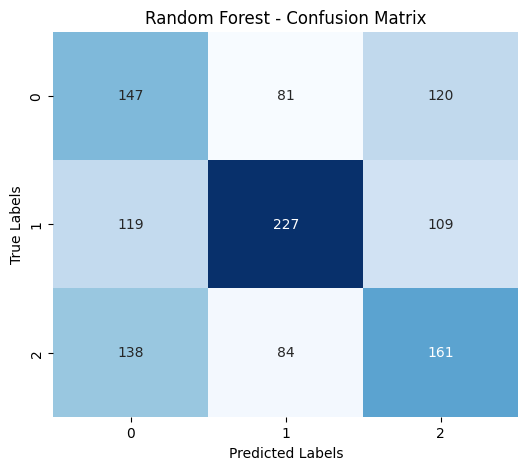

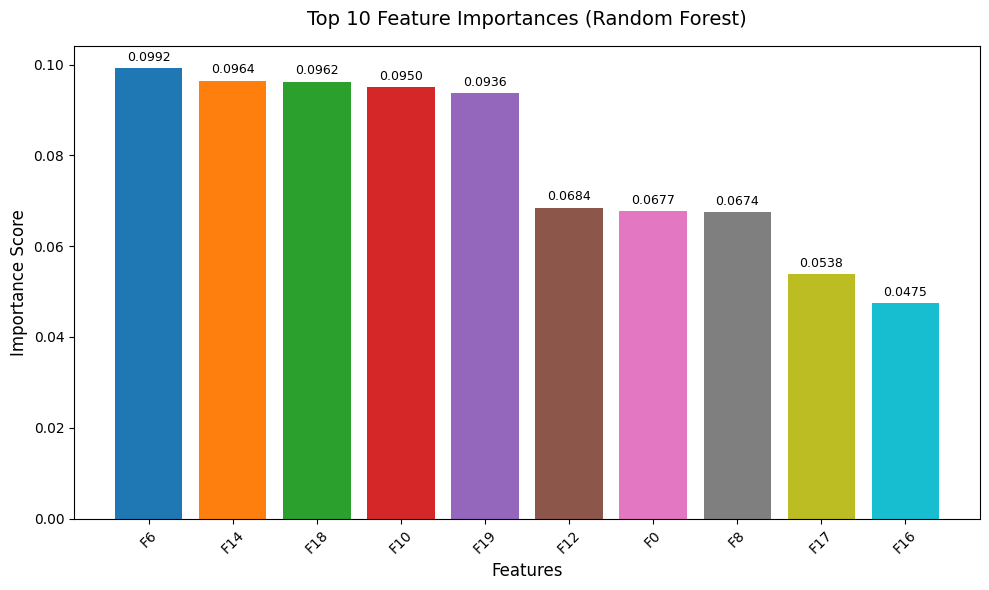

In [43]:
# Optional: print basic info
print("Dataset shape:", df.shape)
print(print(df.head()))

# Remove the first row which is the header
df = df[1:].reset_index(drop=True)

# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where the target variable (column 20) is NaN
df.dropna(subset=[20], inplace=True)

# ✅ Step 3: Split into features (X) and target (y)
# Assuming the target column is the last column (index 20) after removing the header
X = df.drop(columns=[20], errors='ignore')
y = df[20]

if y is None:
    raise ValueError("❌ 'Target' column not found! Please make sure dataset has a Target column.")

# ✅ Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Step 5: (Optional) Feature scaling
# Random Forest doesn’t need scaling, but we can include it for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 6: Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # expand until all leaves are pure
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# ✅ Step 7: Make predictions
y_pred = rf_model.predict(X_test_scaled)

# ✅ Step 8: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Random Forest Accuracy: {accuracy * 100:.2f}%")

# ✅ Step 9: Show detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Step 10: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ✅ Step 11: Feature Importance Plot - Simple and Clean
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar([f'F{int(i)}' for i in top_features.index], top_features.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                      '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14, pad=15)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)

# Add values on top of bars
for bar, value in zip(bars, top_features.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()